
# Description and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

# Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold

## Load and view the dataset

In [2]:
from google.colab import drive,files
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/Deep Learning/Project 6/bank.csv'
data = pd.read_csv(path)
data.head()

Mounted at /content/drive


RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are total 13 columns and 10000 observations in the dataset with no null values

In [5]:
data.describe()

RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]

In [6]:
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
RowNumber                        0.0
CustomerId                       0.0
Surname                          0.0
CreditScore                      0.0
Geography                        0.0
Gender                           0.0
Age                              0.0
Tenure                           0.0
Balance                          0.0
NumOfProducts                    0.0
HasCrCard                        0.0
IsActiveMember                   0.0
EstimatedSalary                  0.0
Exited                           0.0

- There is no null values in the dataset

In [7]:
#Checking that there is no null value in the dataset
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- We can see the dataset is imbalanced.

## EDA

### Univarate Analysis

In [10]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


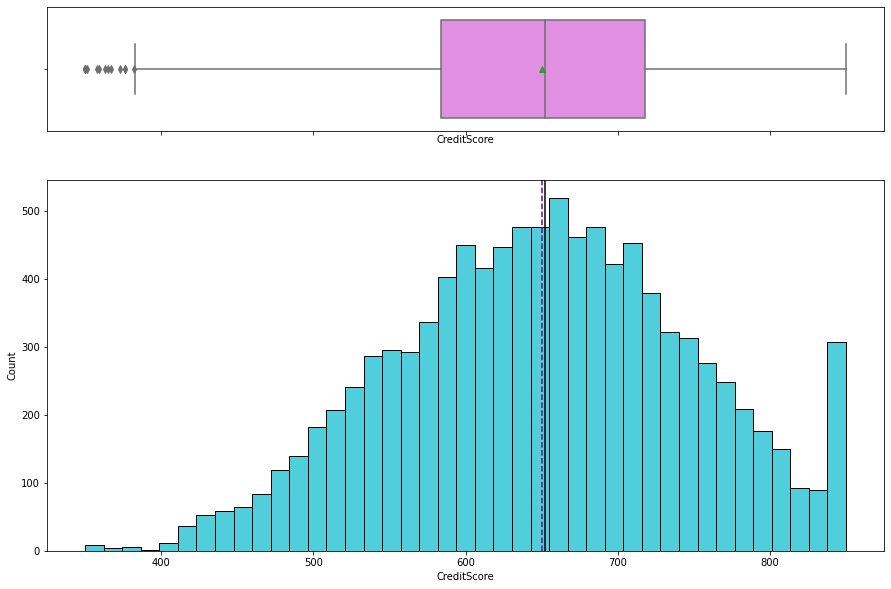

In [11]:
histogram_boxplot(data["CreditScore"])

- We can see some outliers and the mean and median are very close to each other.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


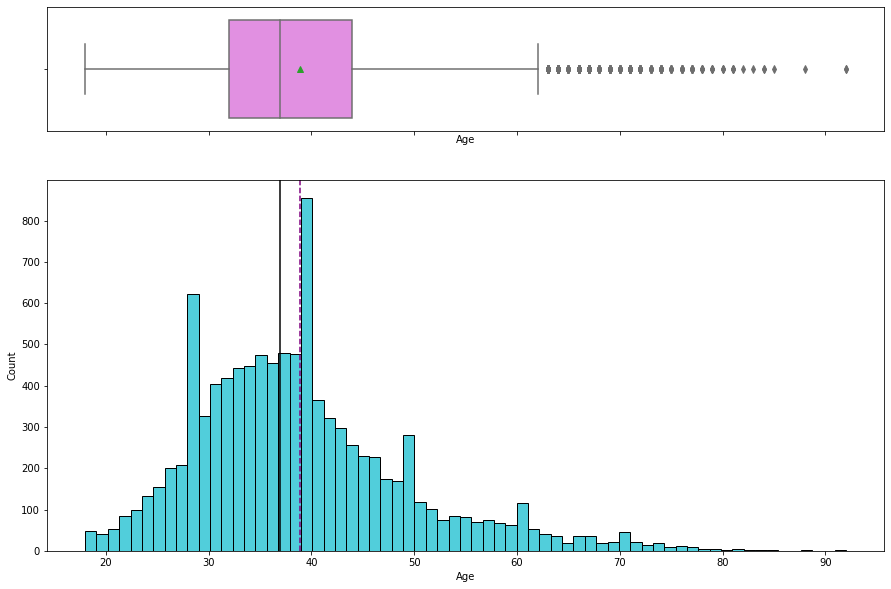

In [12]:
histogram_boxplot(data["Age"])

- Here again we can see some outliers and the mean and median are close to each other

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


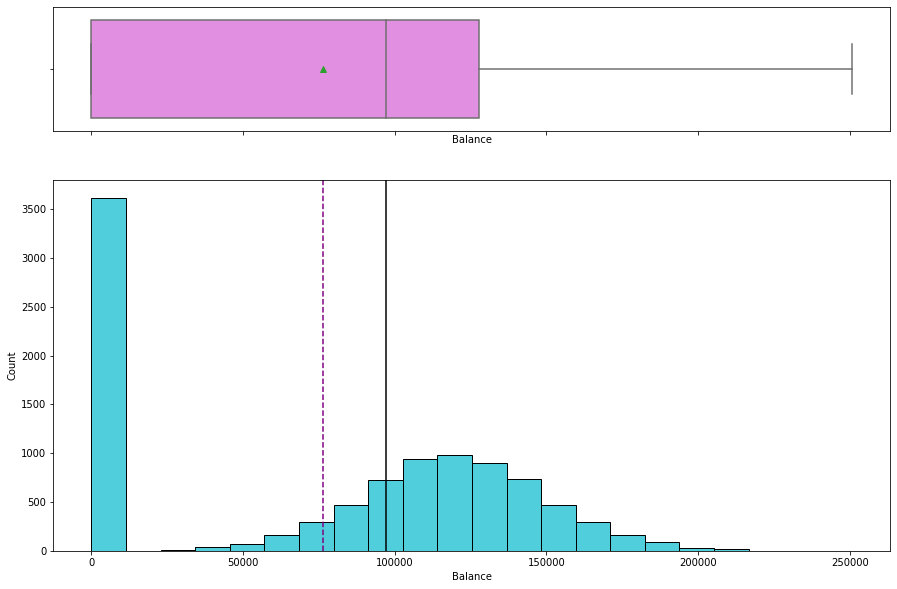

In [13]:
histogram_boxplot(data["Balance"])

- There are lot of customers with really low salaray.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


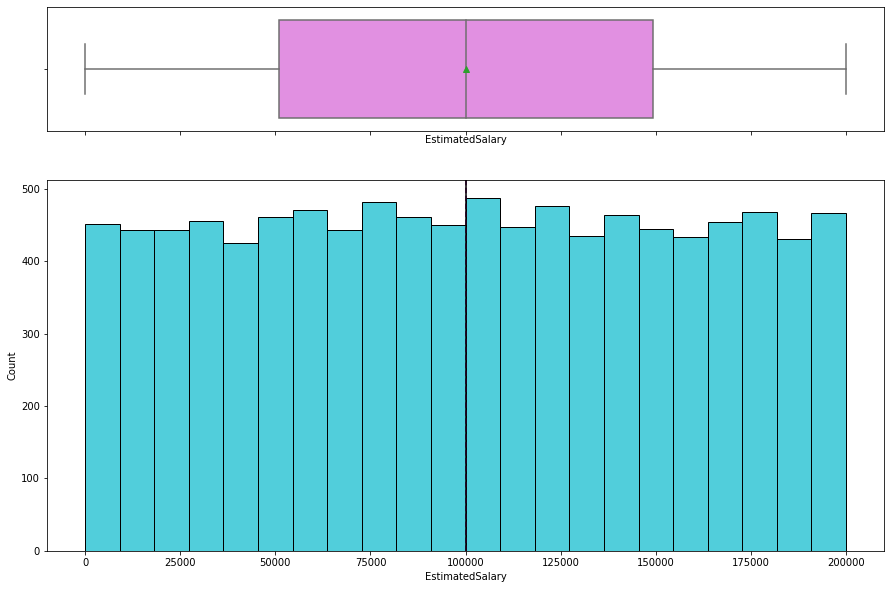

In [14]:
histogram_boxplot(data["EstimatedSalary"])

- Estimated Salary bar chart seems to have almost the same count across different salaries. Mean and Median are really close.

In [15]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


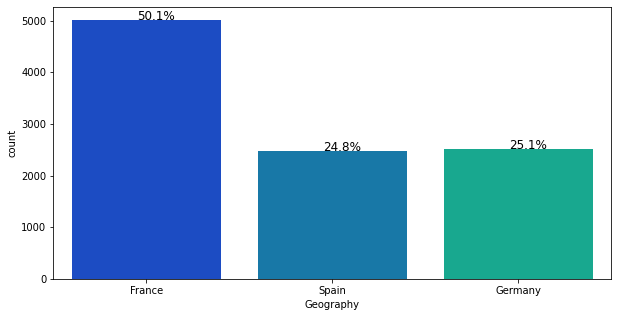

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Geography"], palette="winter")
perc_on_bar(ax, data["Geography"])

- 50 % of the customer are from France and the rest of them are equally distributed between Spain and Germany

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


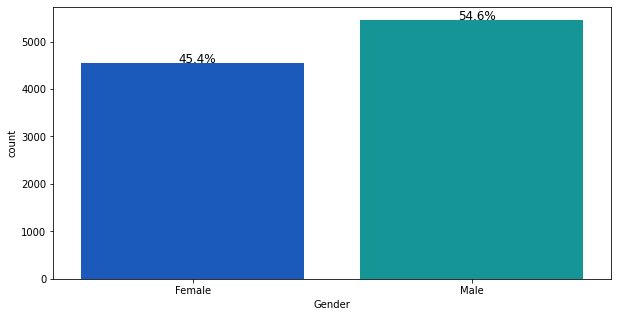

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Gender"], palette="winter")
perc_on_bar(ax, data["Gender"])

- Not major difference in the male/female distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


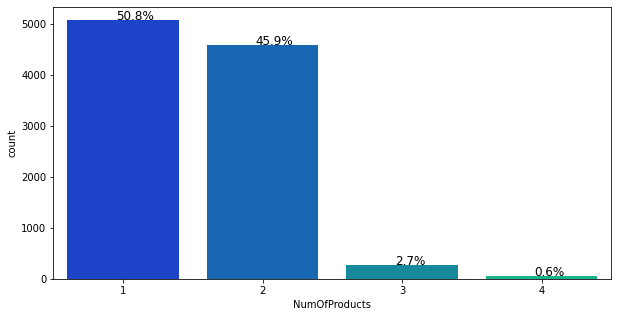

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["NumOfProducts"], palette="winter")
perc_on_bar(ax, data["NumOfProducts"])

- Most of the customers have 1 or 2 (95 % of the customers) cards

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


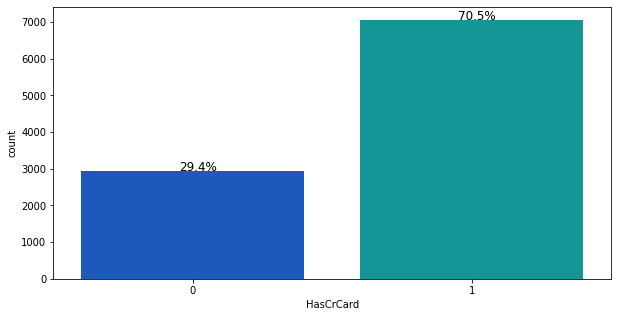

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["HasCrCard"], palette="winter")
perc_on_bar(ax, data["HasCrCard"])

- Around 70% of the customer have card.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


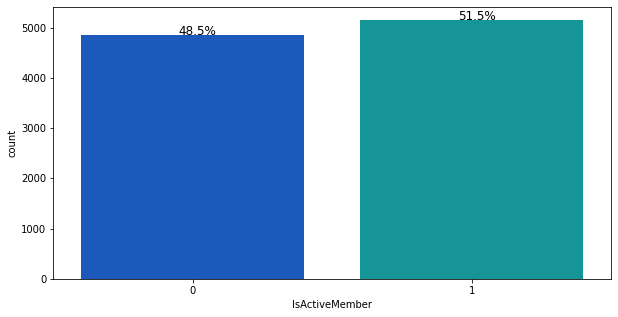

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["IsActiveMember"], palette="winter")
perc_on_bar(ax, data["IsActiveMember"])

- Around same amount of customers are Active/InActive.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


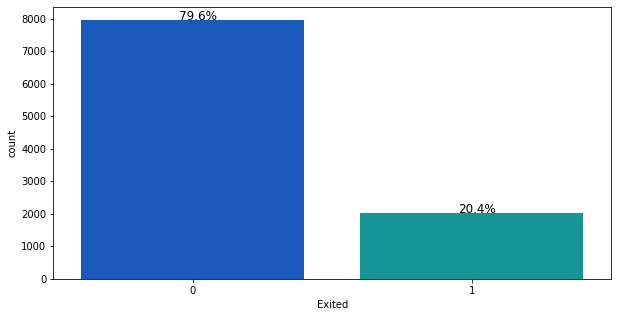

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["Exited"], palette="winter")
perc_on_bar(ax, data["Exited"])

- Only 20% of the customers have exited.

## Bivariate Analysis

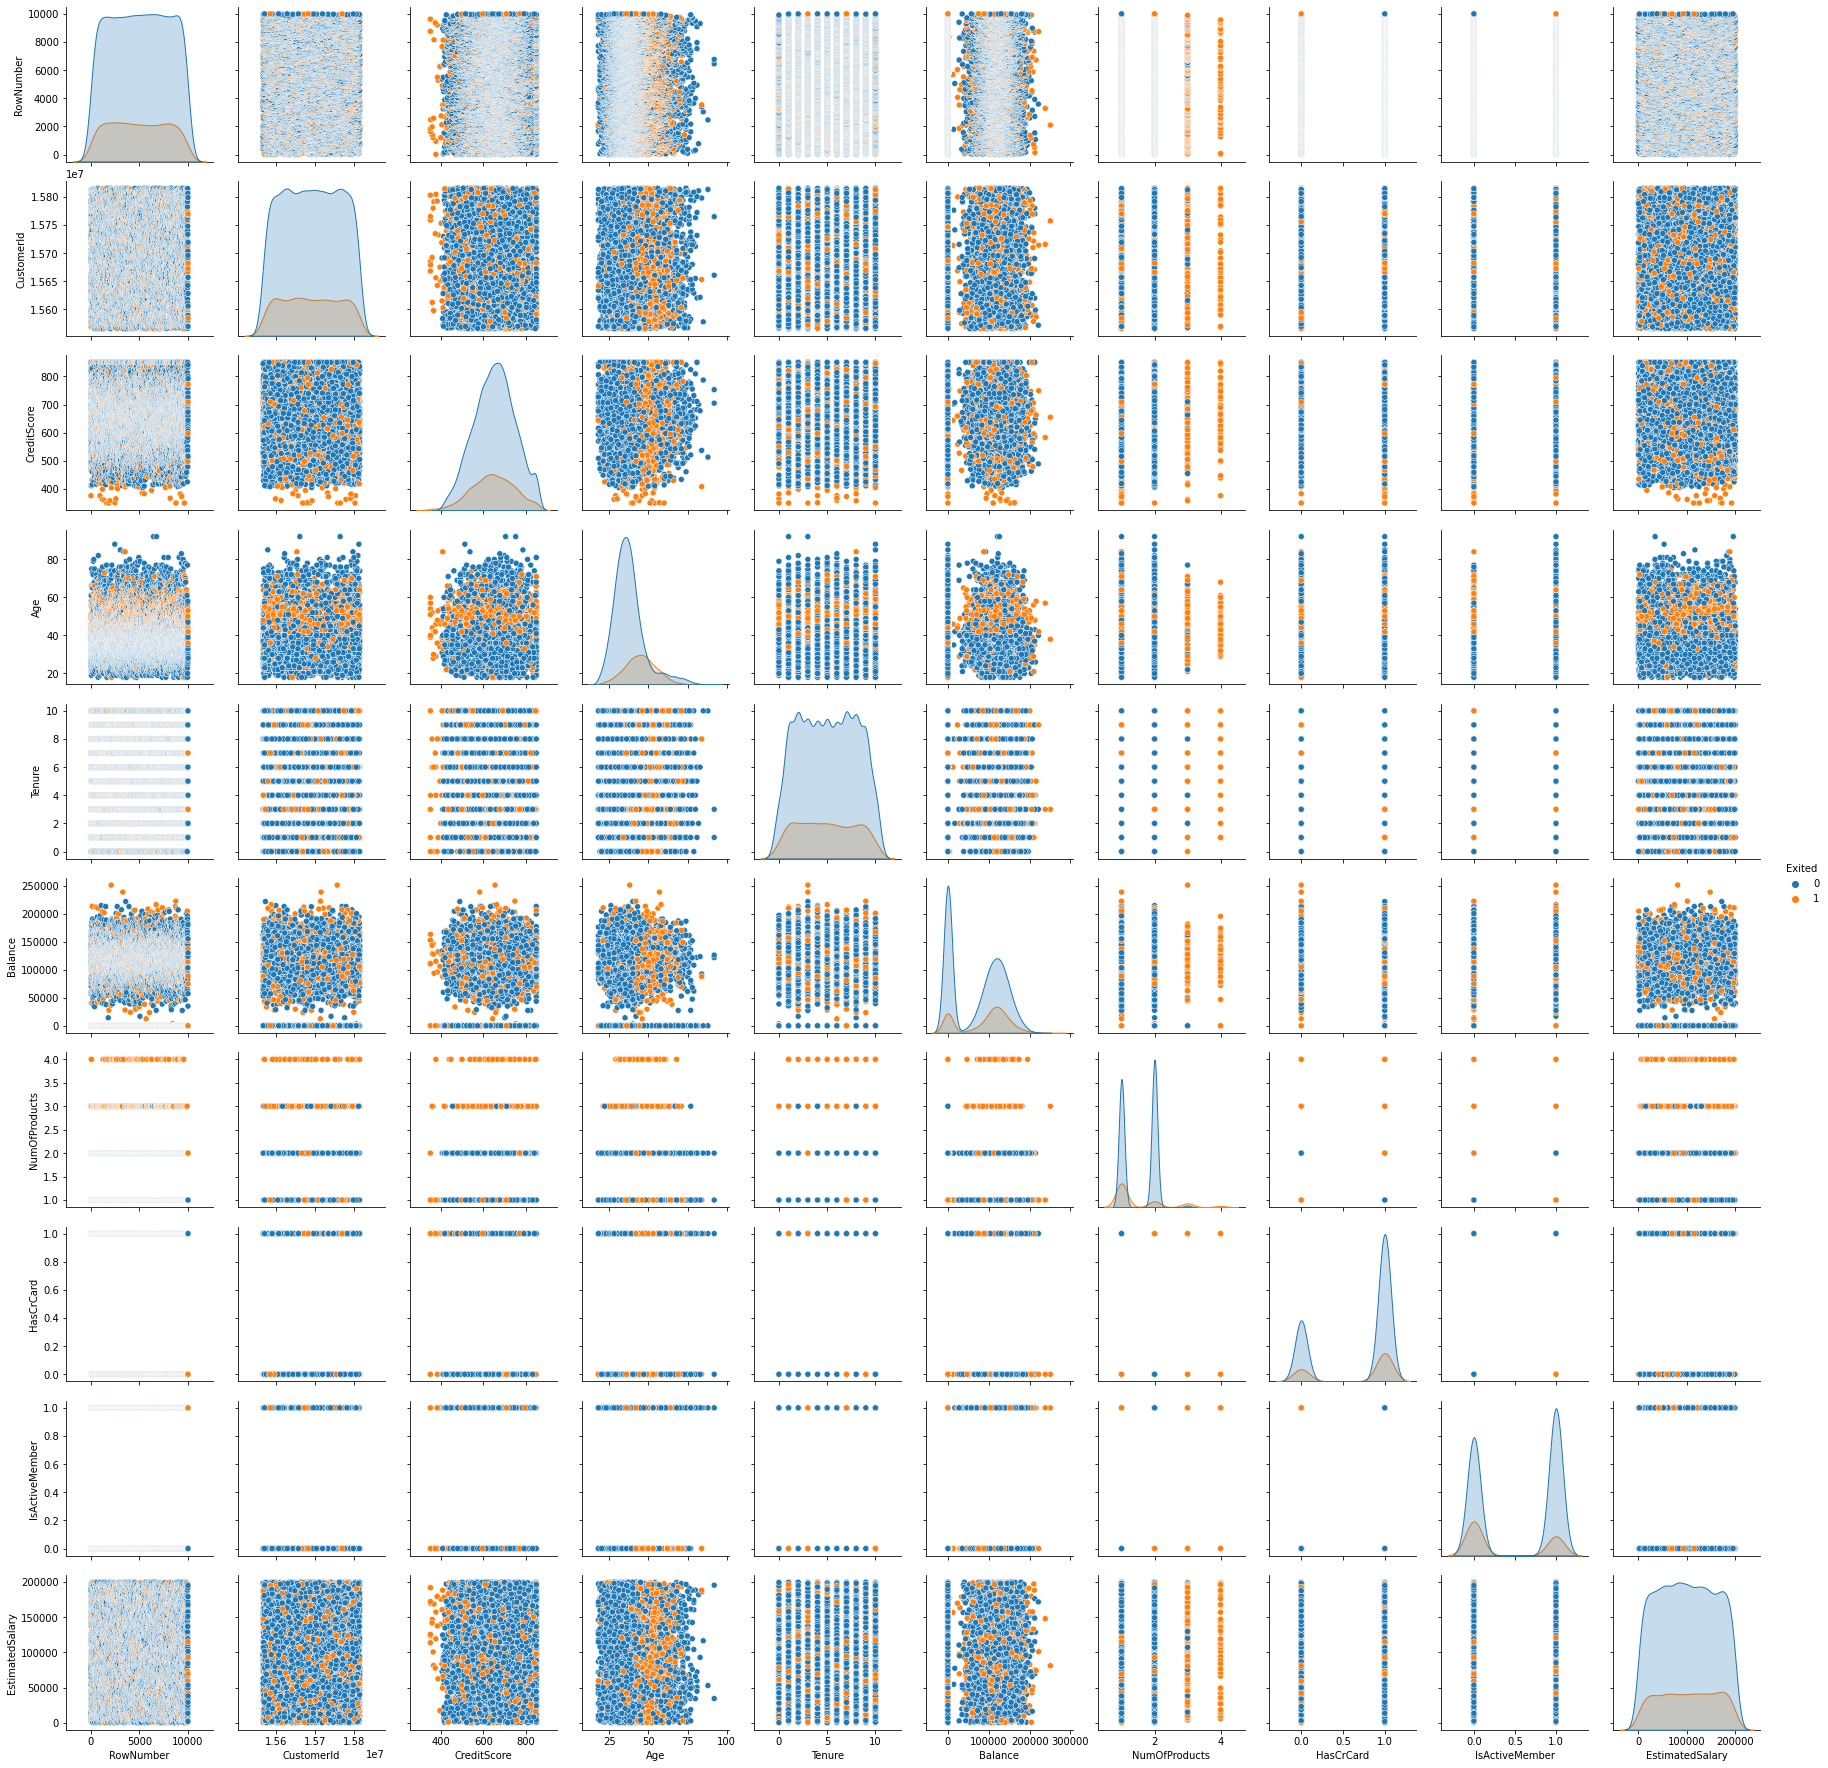

In [22]:
sns.pairplot(data, hue="Exited")

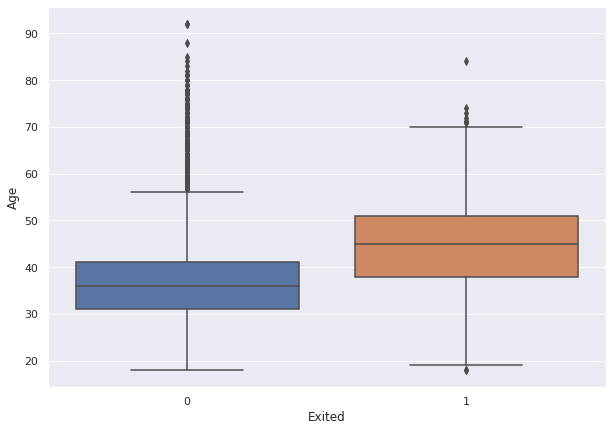

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Exited", y="Age", data=data, orient="vertical")

- Average Age of customers who have exited vs non-exited remains the same.

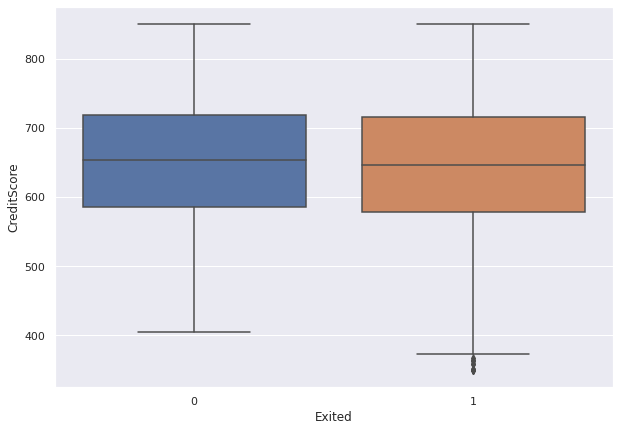

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Exited", y="CreditScore", data=data, orient="vertical")

- CreditScore of customers looks very identical for customer who have exited vs non-exited.

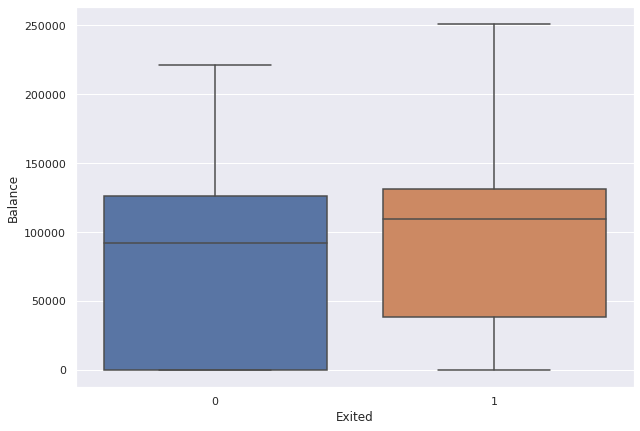

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Exited", y="Balance", data=data, orient="vertical")

- Customers who exit seems to have a higher balance compared to the customers who stay back

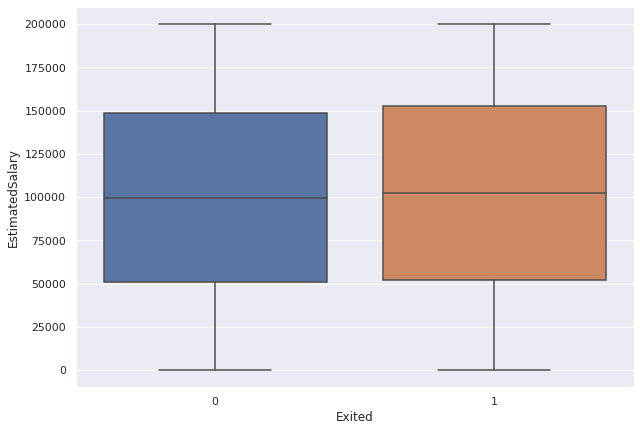

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Exited", y="EstimatedSalary", data=data, orient="vertical")

- Estimated Salary for the customers looks very identical

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Exited"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Exited"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


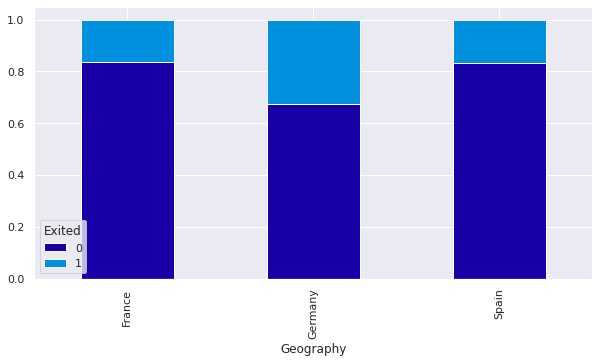

In [ ]:
stacked_plot(data["Geography"])

- Relatively higher percentage of customers from Germany seems to be exiting compared to France and Spain

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


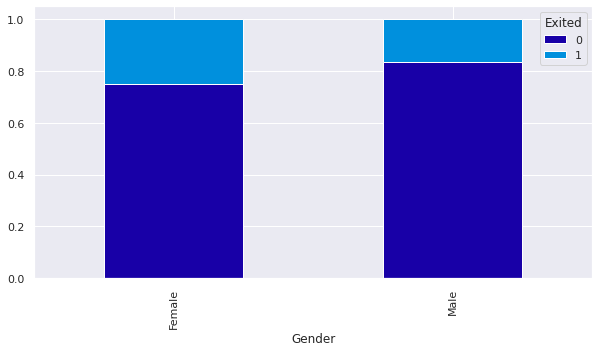

In [ ]:
stacked_plot(data["Gender"])

- Not a major difference between the male/female customers who are exiting.

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


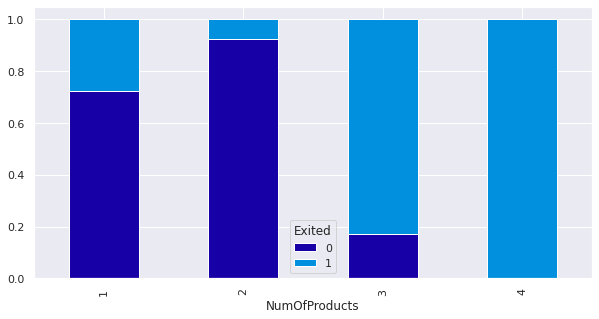

In [ ]:
stacked_plot(data["NumOfProducts"])

- Customers who have lesser number of producs (2 or less) seems not to exit compared to customers with more number of products.

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


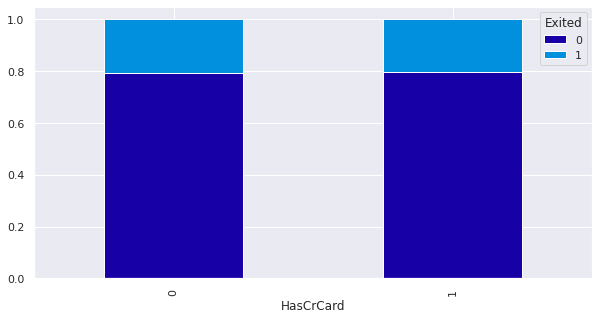

In [ ]:
stacked_plot(data["HasCrCard"])

- Similar trend between customers who has credit card when it comes to leaving.

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


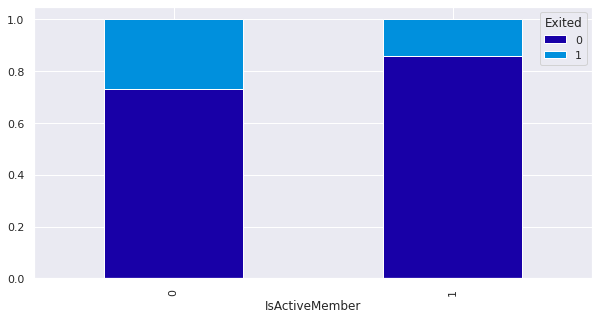

In [ ]:
stacked_plot(data["IsActiveMember"])

- Similar trend when it comes to IsActivemember when it comes to exiting.

## Data Preprocessing.

In [ ]:

data=data.drop(["RowNumber","CustomerId","Surname"], axis=1)
data.shape

(10000, 11)

In [ ]:
#creating dummy variables for the categorical features
modified_data = pd.get_dummies(data,drop_first=True)
#modified_data = modified_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
modified_data

CreditScore  Age  Tenure  ...  Geography_Germany  Geography_Spain  Gender_Male
0             619   42       2  ...                  0                0            0
1             608   41       1  ...                  0                1            0
2             502   42       8  ...                  0                0            0
3             699   39       1  ...                  0                0            0
4             850   43       2  ...                  0                1            0
...           ...  ...     ...  ...                ...              ...          ...
9995          771   39       5  ...                  0                0            1
9996          516   35      10  ...                  0                0            1
9997          709   36       7  ...                  0                0            0
9998          772   42       3  ...                  1                0            1
9999          792   28       4  ...                  0                0            0

[10000 rows x 12 columns]

## Split the data into train and test sets

In [ ]:
X = modified_data.drop(["Exited"], axis=1)
y = modified_data["Exited"]

In [ ]:
#Standardizing the columns with the help of StandardScaler.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


#### Function to build the confusion matrix.



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Function to draw the confusion matrix for a given model with threshold of 0.5

In [ ]:
def draw_confusion_matrix(model):
  ## Confusion Matrix on unsee test set
  y_pred = model.predict(X_test)
  for i in range(len(y_test)):
    if y_pred[i]>0.5:
      y_pred[i]=1 
    else:
      y_pred[i]=0

  cm2=confusion_matrix(y_test, y_pred)
  labels = ['True Negative','False Positive','False Negative','True Positive']
  categories = [ 'No','Yes']
  make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Function to draw roc auc curve for a model with optimal threshold.

In [ ]:
def draw_roc_auc(model,optimal_th,optimal_point):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc
  from sklearn.metrics import precision_recall_curve

  y_pred_prob = model.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  auc = auc(fpr, tpr)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
  plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
  plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

### Function to draw the precision recall curve for a model with a best f1score.

In [ ]:
def draw_precision_recall(model,ix):
  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc
  from sklearn.metrics import precision_recall_curve

  y_pred_prob = model.predict(X_test)
  precision,recall,th=precision_recall_curve(y_test,y_pred_prob)
  plt.plot(recall, precision)
  plt.plot(recall[ix], precision[ix], marker='o', color='r')
  plt.text(recall[ix], precision[ix], f'Best:{th[ix]:.2f}')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall Curve')
  plt.show()

### Draw the confusion matrix for a model with a optimal threshold

In [ ]:
def draw_cm_matrix(model,threshold):
  ## Confusion Matrix on unsee test set
  y_pred = model.predict(X_test)
  for i in range(len(y_test)):
    if y_pred[i]>threshold:
      y_pred[i]=1 
    else:
      y_pred[i]=0

  cm2=confusion_matrix(y_test, y_pred)
  labels = ['True Negative','False Positive','False Negative','True Positive']
  categories = [ 'No','Yes']
  make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Find the right threshold for a model.
- There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.
- It turns out there is a much faster way to get the same result, called the Youden’s J statistic.

- J = TruePositiveRate – FalsePositiveRate


In [ ]:
def find_threshold(model):
  y_pred_prob = model.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

  print(roc_auc_score(y_test, y_pred_prob))
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  point = [fpr[optimal_idx], tpr[optimal_idx]]
  print("Threshold value is:", optimal_threshold,"point is",point)
  return optimal_threshold,point


In [ ]:
def find_threshold_pr(model):
  y_pred_prob = model.predict(X_test)
  precision,recall,thresholds=precision_recall_curve(y_test,y_pred_prob)
  fscore = (2 * precision * recall) / (precision + recall)
  # locate the index of the largest f score
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  return ix


## Model evaluation criterion
###  Model can make wrong predictions as:
- Predicting a customer is exiting and the customer is not exiting
- Predicting a customer is not exiting and customer is exiting
### Which case is more important?
- Predicting that customer is not exiting but actually is exiting. It might result in heavy loss to the bank
### How to reduce this loss i.e need to reduce False Negative?
- Company would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative

### Let us explore Neural Network Models

## **Model 1 - Simple Model**
- Simple Model with 4 hidden layers and a final output layer with sigmoid activation
Model-1

- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exiting (0) or exiting (1).
a dropout step is included to prevent overfitting.

- Creating a model : Keras model object can be created with Sequential class

In [ ]:
#initialize the model
model = Sequential()

- Adding layers [layers and activations]
- Keras layers can be added to the model

In [ ]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=22, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
#model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exit or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification exit or not

#### Model compile [optimizers and loss functions]
- Keras model should be "compiled" prior to training

- Types of loss (function) and optimizer should be designated

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

#### Let's print the summary of the model¶


In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 22)                264       
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 184       
_________________________________________________________________
dense_65 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


#### Training [Forward pass and Backpropagation]
Training the model

In [ ]:

#fitting the model
his_mod1=model.fit(X_train,y_train,batch_size=15,epochs=300,validation_split=0.2)

Epoch 1/300
427/427 [==============================] - 2s 3ms/step - loss: 0.4578 - accuracy: 0.7946 - val_loss: 0.4039 - val_accuracy: 0.8281
Epoch 2/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8380 - val_loss: 0.4032 - val_accuracy: 0.8281
Epoch 3/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8521 - val_loss: 0.3903 - val_accuracy: 0.8356
Epoch 4/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8490 - val_loss: 0.3820 - val_accuracy: 0.8475
Epoch 5/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8668 - val_loss: 0.3888 - val_accuracy: 0.8494
Epoch 6/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8601 - val_loss: 0.3660 - val_accuracy: 0.8531
Epoch 7/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8645 - val_loss: 0.3720 - val_accuracy: 0.8469

- Plotting the train and test loss

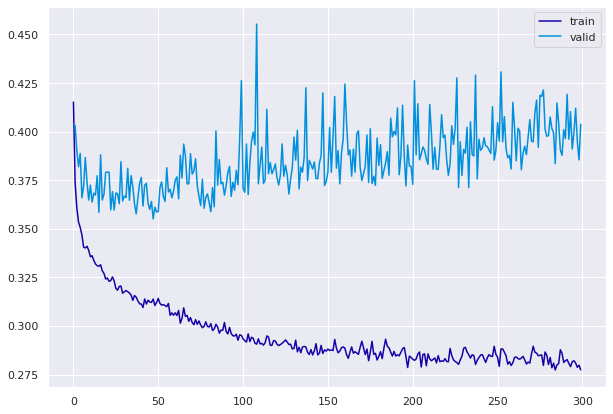

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod1.history)
hist['epoch'] = his_mod1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

- Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8530
[0.39252012968063354, 0.8529999852180481]


- The accuracy of the model is around 85%

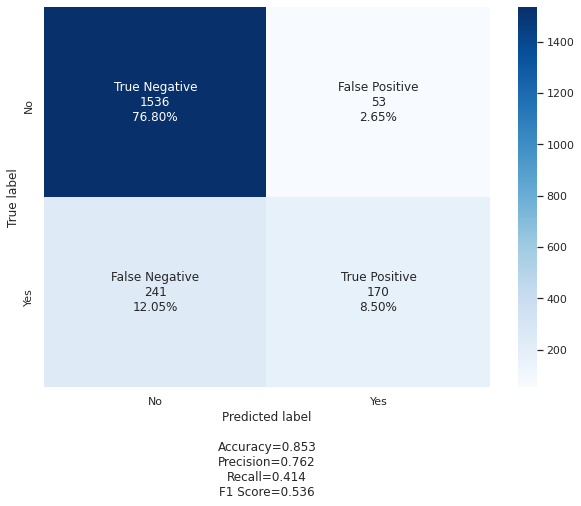

In [ ]:
draw_confusion_matrix(model)

- We can see the accuracy to be 85% and Precision to be 76%, but the recall is very low. We need to see a way of reducing the recall.

#### Finding the optimal threshold for this model.

In [ ]:
opt_threshold,opt_point = find_threshold(model)

0.8253549723693459
Threshold value is: 0.1764065 point is [0.24166142227816237, 0.7396593673965937]


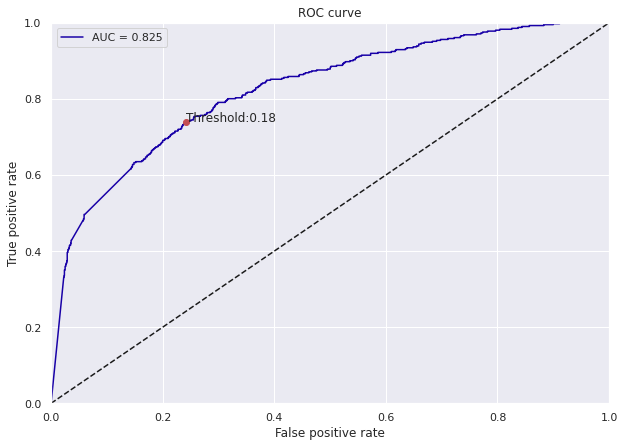

In [ ]:
draw_roc_auc(model,opt_threshold,opt_point)

- Drawing the ROC Curve and finding out the optimal threshold which when considered will increase the recall of the model.

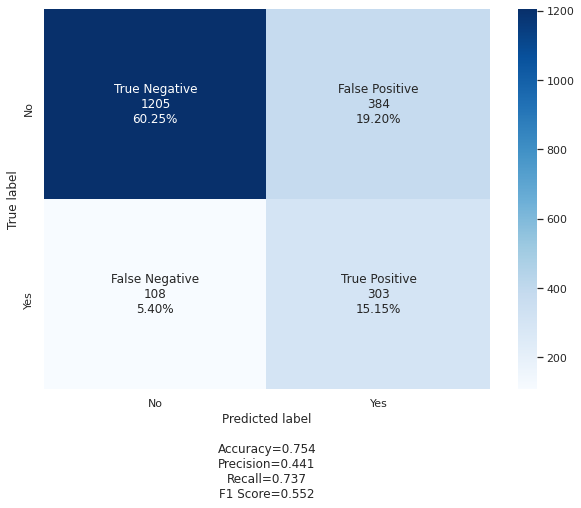

In [ ]:
draw_cm_matrix(model,opt_threshold)

- Drawing the confusion matrix with the optimal threshold from this model, we could see the recall has gone up but the accuracy and precision of the model has come down.
- We have to see if we can still reduce the false negatives and still have a good accuracy/precision.

## **Model 2 - Early Stopping**
Let's try another architecture to get the better Recall. There are some basic Hyperparameters which can help to get the better model performance.

Early stopping:

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [ ]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
model2 = Sequential()
#Initializing the weights uisng hue_normal 
model2.add(Dense(22, input_shape=(11, ), kernel_initializer='he_normal', activation='relu'))
#Model2.add(Dropout(0.5))
model2.add(Dense(8, kernel_initializer='he_normal', activation='relu'))
#Model2.add(Dropout(0.5))
model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model2.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= model2.fit(X_train, y_train, validation_split=0.2, batch_size=15, epochs=300, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/300
427/427 [==============================] - 2s 3ms/step - loss: 0.4510 - accuracy: 0.8017 - val_loss: 0.3746 - val_accuracy: 0.8494
Epoch 2/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3626 - accuracy: 0.8476 - val_loss: 0.3629 - val_accuracy: 0.8575
Epoch 3/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8611 - val_loss: 0.3760 - val_accuracy: 0.8512
Epoch 4/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8673 - val_loss: 0.3593 - val_accuracy: 0.8562
Epoch 5/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8592 - val_loss: 0.3648 - val_accuracy: 0.8506
Epoch 6/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8610 - val_loss: 0.3563 - val_accuracy: 0.8562
Epoch 7/300
427/427 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8674 - val_loss: 0.3576 - val_accuracy: 0.8525

- Plotting the train and validation loss



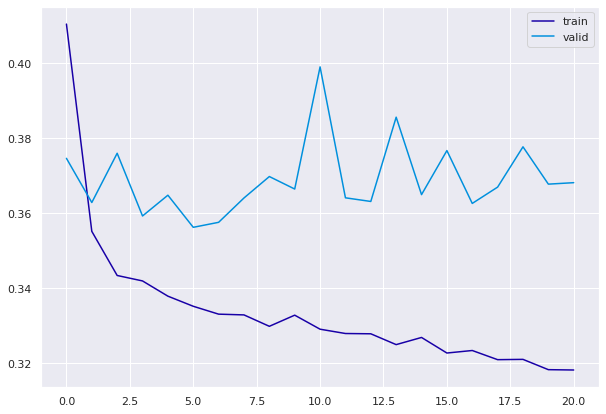

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [ ]:
score = model2.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8580
[0.3515227735042572, 0.8579999804496765]


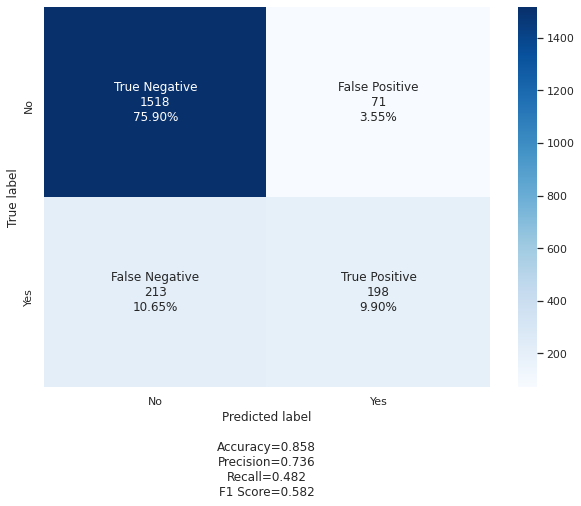

In [ ]:
draw_confusion_matrix(model2)

- We can see the accuracy to be 85% and Precision to be 73%, but the recall has increased compared to model 1.

- Find optimal threshold for this model

In [ ]:
opt_threshold,opt_point = find_threshold(model2)

0.8498941169445045
Threshold value is: 0.25628066 point is [0.16928886091881687, 0.7250608272506083]


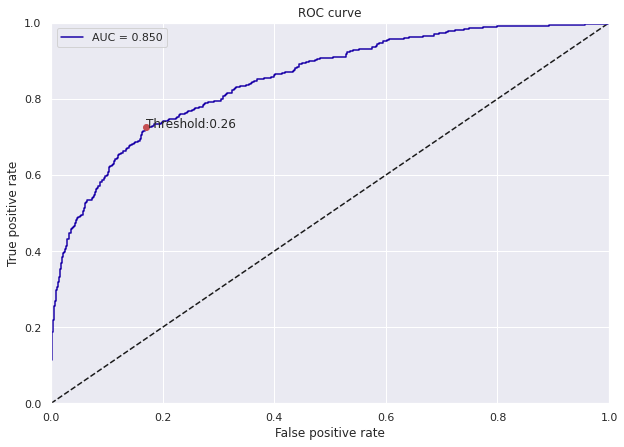

In [ ]:
draw_roc_auc(model2,opt_threshold,opt_point)

- Finding the optimal threshold from the roc curve.

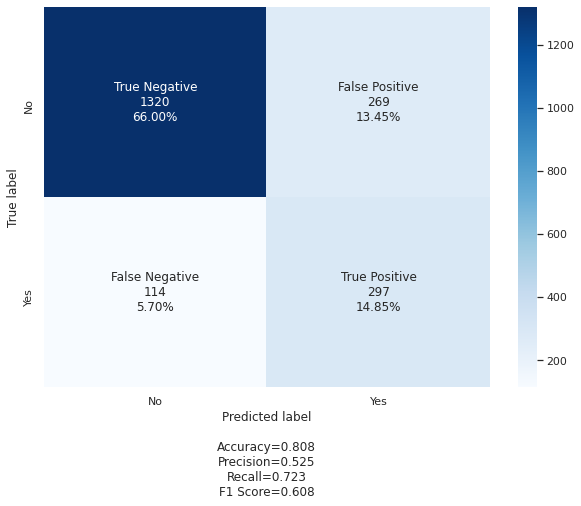

In [ ]:
draw_cm_matrix(model2,opt_threshold)

- We can see the recall has increased compared to the threshold of 0.5, but the precision and accuracy is still low.

- Let's try weighted loss for imbalance dataset



## **Model 3 - Weighted Loss**
Weighted loss to account for large class imbalance in train dataset
we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection.
We will use our first ANN model and apply weighted loss

Let's review the process:

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

- The class 'Exiting' (y=1) is assigned a weight of 2.4 vs 0.6 for the class 'not exiting' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on exiting cases during training.

- Training the model

In [ ]:
his_mod3=model.fit(X_train,y_train,validation_split=0.2,batch_size=15,epochs=300, class_weight=class_weights, shuffle=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/300
427/427 [==============================] - 2s 3ms/step - loss: 0.3971 - accuracy: 0.8250 - val_loss: 0.4544 - val_accuracy: 0.8200
Epoch 2/300
427/427 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8228 - val_loss: 0.4560 - val_accuracy: 0.8012
Epoch 3/300
427/427 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8273 - val_loss: 0.4746 - val_accuracy: 0.7906
Epoch 4/300
427/427 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8270 - val_loss: 0.4601 - val_accuracy: 0.7962
Epoch 5/300
427/427 [==============================] - 1s 3ms/step - loss: 0.3795 - accuracy: 0.8297 - val_loss: 0.5162 - val_accuracy: 0.7644
Epoch 6/300
427/427 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8250 - val_loss: 0.4701 - val_accuracy: 0.7987
Epoc

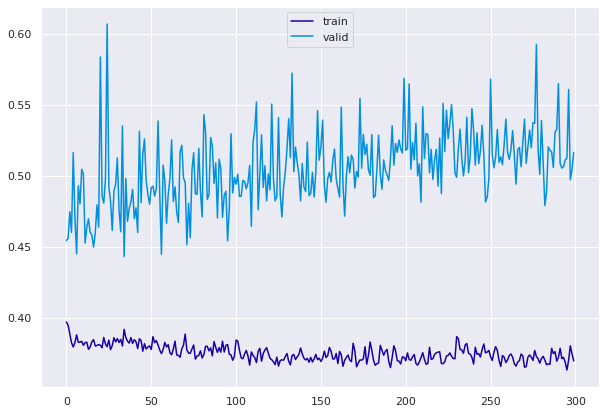

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod3.history)
hist['epoch'] = his_mod3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [ ]:
score_weighted = model.evaluate(X_test, y_test)
print(score_weighted)

63/63 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.7635
[0.5127261281013489, 0.7634999752044678]


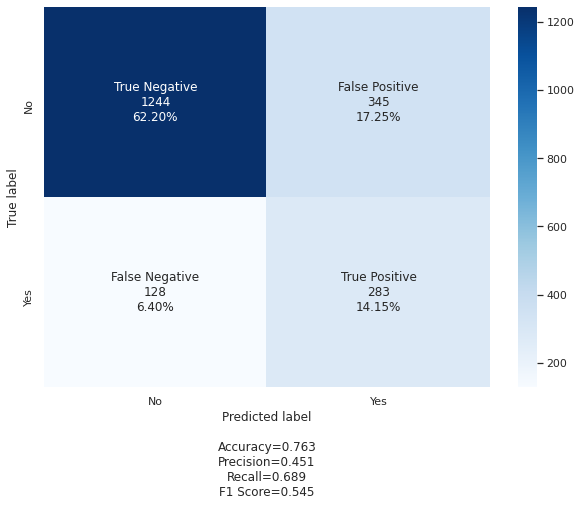

In [ ]:
draw_confusion_matrix(model)

- As you can see here the recall has increased but the precision is very bad. 

In [ ]:
opt_threshold,opt_point = find_threshold(model)

0.8204505121126235
Threshold value is: 0.58851063 point is [0.17998741346758967, 0.6739659367396593]


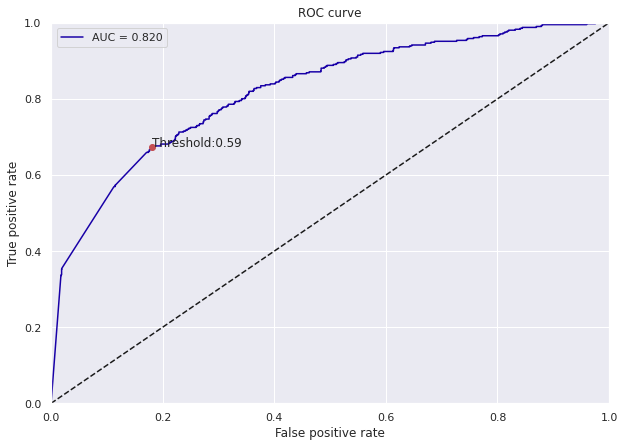

In [ ]:
draw_roc_auc(model,opt_threshold,opt_point)

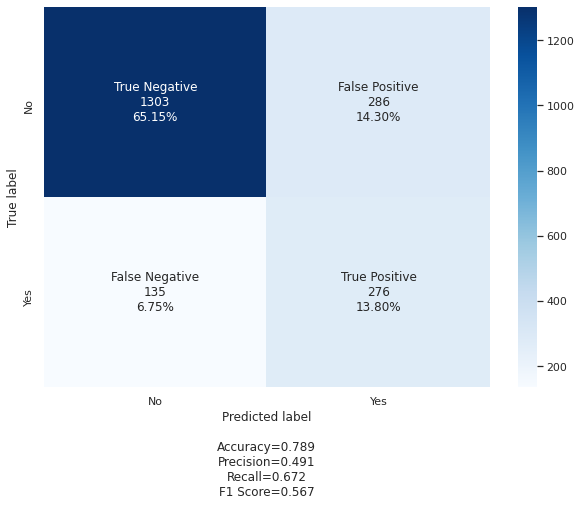

In [ ]:
draw_cm_matrix(model,opt_threshold)

- We can see by optimising the threshold we can see the recall has increased and also the precision has increased compared to the threshold of 0.5

## **Model 4 - Dropout**

Dropout is a regularization technique for neural network models. A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

- Model with a drop out in between one of the layers.

In [ ]:
#initialize the model
model4 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model4.add(Dense(units=22, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model4.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
model4.add(Dropout(0.5))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(4,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exit or not)
# We use the sigmoid because we want probability outcomes
model4.add(Dense(1,activation='sigmoid'))     

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model4.compile(Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 22)                264       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 184       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 561
Trainable params: 561
Non-trainable params: 0
________________________________________________________

In [ ]:
#fitting the model
his_mod4=model4.fit(X_train,y_train,batch_size=15,epochs=300,validation_split=0.2)

Epoch 1/300
427/427 [==============================] - 2s 3ms/step - loss: 0.5878 - accuracy: 0.7527 - val_loss: 0.5150 - val_accuracy: 0.7894
Epoch 2/300
427/427 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.8084 - val_loss: 0.5148 - val_accuracy: 0.7894
Epoch 3/300
427/427 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.7974 - val_loss: 0.5151 - val_accuracy: 0.7894
Epoch 4/300
427/427 [==============================] - 1s 2ms/step - loss: 0.4958 - accuracy: 0.8036 - val_loss: 0.5151 - val_accuracy: 0.7894
Epoch 5/300
427/427 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.7894 - val_loss: 0.4908 - val_accuracy: 0.7894
Epoch 6/300
427/427 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.8173 - val_loss: 0.3899 - val_accuracy: 0.8456
Epoch 7/300
427/427 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8395 - val_loss: 0.3827 - val_accuracy: 0.8431

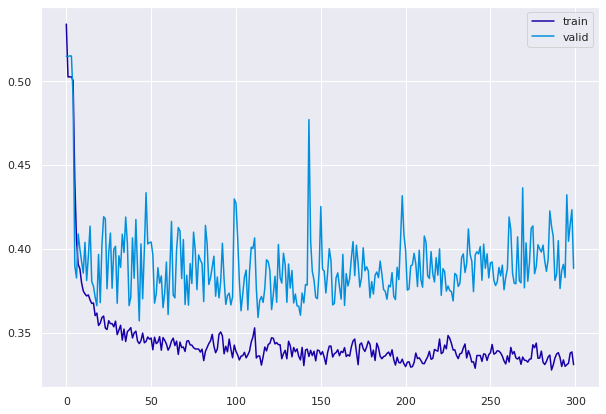

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod4.history)
hist['epoch'] = his_mod4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score=model4.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8550


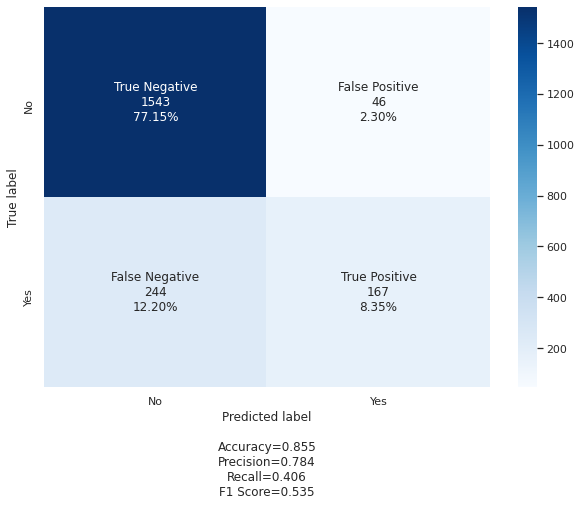

In [ ]:
draw_confusion_matrix(model4)

In [ ]:
opt_threshold,opt_point = find_threshold(model4)

0.796288044784781
Threshold value is: 0.24566725 point is [0.15166771554436753, 0.6739659367396593]


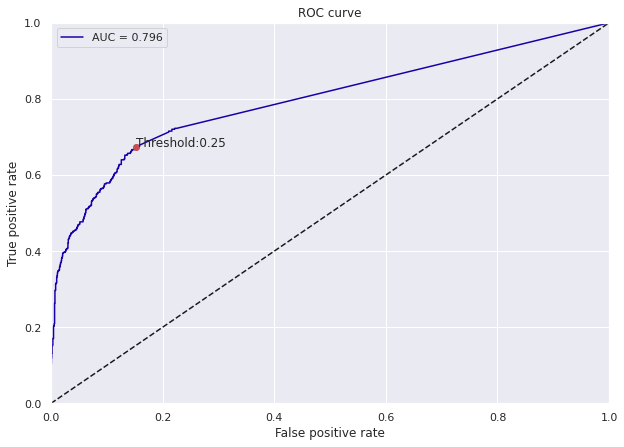

In [ ]:
draw_roc_auc(model4,opt_threshold,opt_point)

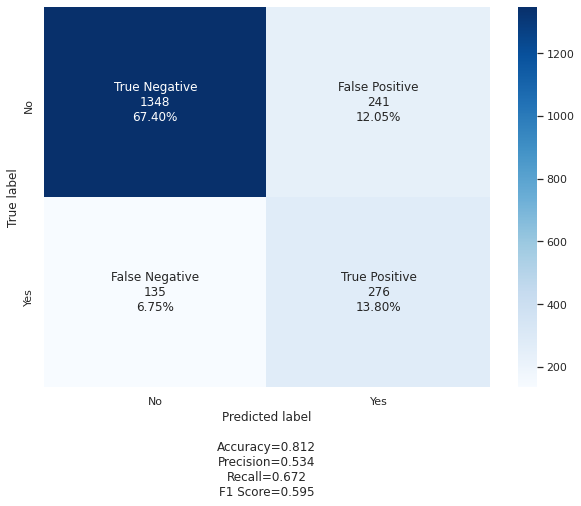

In [ ]:
draw_cm_matrix(model4,opt_threshold)

## **Model 5 - OverSampling**
Due to the imbalance in the dataset, here we randomly duplicate examples in the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before UpSampling, counts of label 'Yes': 1626
Before UpSampling, counts of label 'No': 6374 

After UpSampling, counts of label 'Yes': 6374
After UpSampling, counts of label 'No': 6374 

After UpSampling, the shape of train_X: (12748, 11)
After UpSampling, the shape of train_y: (12748,) 



In [ ]:
model5 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model5.add(Dense(units=22, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model5.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
#model.add(Dropout(0.5))
model5.add(Dense(8,activation='relu'))
model5.add(Dense(4,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exit or not)
# We use the sigmoid because we want probability outcomes
model5.add(Dense(1,activation='sigmoid'))                        # binary classification exit or not

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model5.compile(Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fitting the model
his_mod5=model5.fit(X_train_over,y_train_over,batch_size=15,epochs=300,validation_split=0.2)

Epoch 1/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8325 - val_loss: 0.5547 - val_accuracy: 0.7357
Epoch 2/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8327 - val_loss: 0.4757 - val_accuracy: 0.7353
Epoch 3/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8283 - val_loss: 0.4790 - val_accuracy: 0.8671
Epoch 4/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8271 - val_loss: 0.4420 - val_accuracy: 0.8773
Epoch 5/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8313 - val_loss: 0.4828 - val_accuracy: 0.8608
Epoch 6/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8259 - val_loss: 0.3894 - val_accuracy: 0.8894
Epoch 7/300
680/680 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8349 - val_loss: 0.5602 - val_accuracy: 0.6824

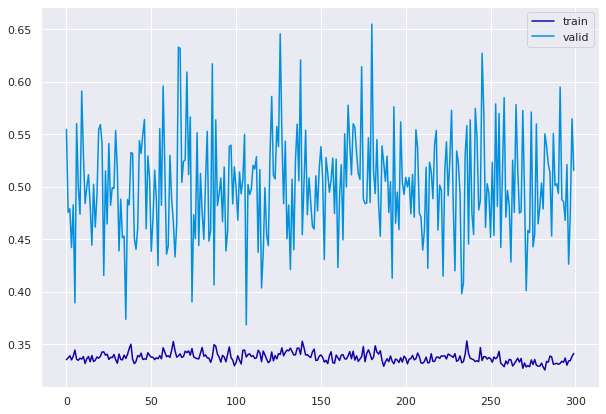

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod5.history)
hist['epoch'] = his_mod5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model5.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7715
[0.4447237253189087, 0.7714999914169312]


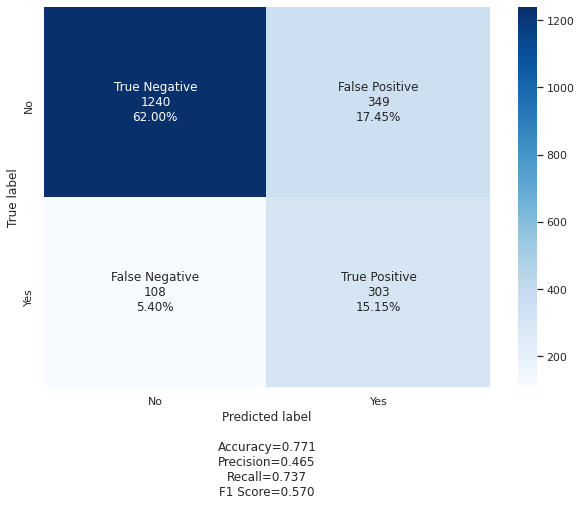

In [ ]:
draw_confusion_matrix(model5)

In [ ]:
opt_threshold,opt_point = find_threshold(model5)

0.8314889929089744
Threshold value is: 0.51669586 point is [0.2196349905601007, 0.7372262773722628]


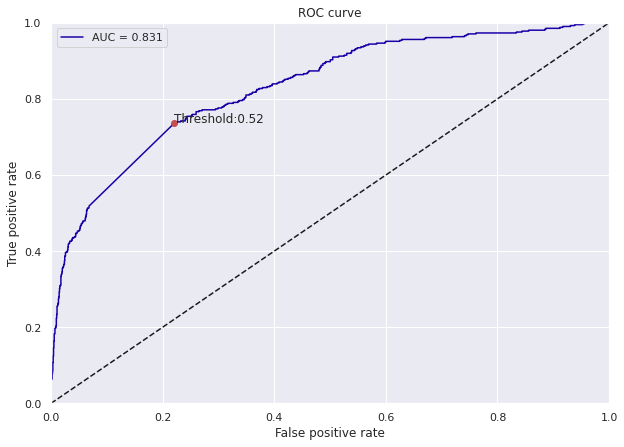

In [ ]:
draw_roc_auc(model5,opt_threshold,opt_point)

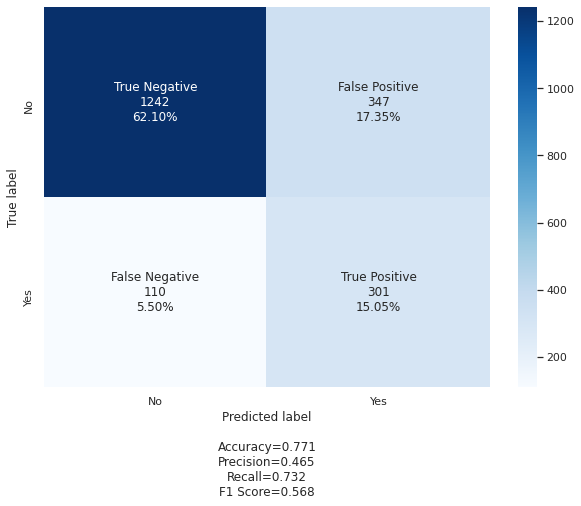

In [ ]:
draw_cm_matrix(model5,opt_threshold)

## **Model 6 - UnderSampling**
Due to the imbalance in the dataset, here we randomly delete examples in the majority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1626
Before Under Sampling, counts of label 'No': 6374 

After Under Sampling, counts of label 'Yes': 1626
After Under Sampling, counts of label 'No': 1626 

After Under Sampling, the shape of train_X: (3252, 11)
After Under Sampling, the shape of train_y: (3252,) 



In [ ]:
model6 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model5.add(Dense(units=22, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model6.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
#model.add(Dropout(0.5))
model6.add(Dense(8,activation='relu'))
model6.add(Dense(4,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exit or not)
# We use the sigmoid because we want probability outcomes
model6.add(Dense(1,activation='sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model6.compile(Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fitting the model
his_mod6=model6.fit(X_train_un,y_train_un,batch_size=15,epochs=300,validation_split=0.2)

Epoch 1/300
174/174 [==============================] - 48s 3ms/step - loss: 0.6303 - accuracy: 0.6593 - val_loss: 0.8390 - val_accuracy: 0.5100
Epoch 2/300
174/174 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7263 - val_loss: 0.8129 - val_accuracy: 0.4608
Epoch 3/300
174/174 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7514 - val_loss: 0.8428 - val_accuracy: 0.5668
Epoch 4/300
174/174 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7651 - val_loss: 0.7621 - val_accuracy: 0.5899
Epoch 5/300
174/174 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7745 - val_loss: 0.7284 - val_accuracy: 0.5945
Epoch 6/300
174/174 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7981 - val_loss: 0.6687 - val_accuracy: 0.6436
Epoch 7/300
174/174 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7872 - val_loss: 0.6105 - val_accuracy: 0.665

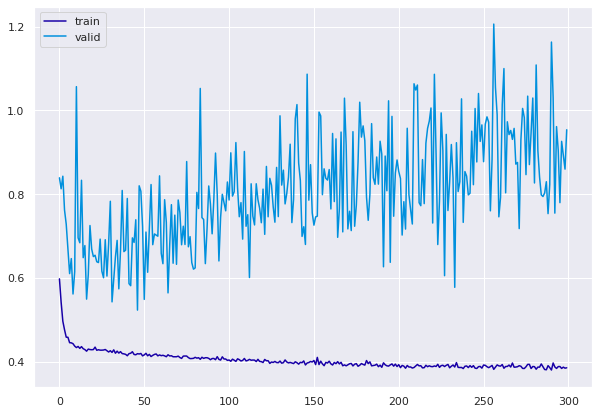

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod6.history)
hist['epoch'] = his_mod6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = model6.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8215
[0.44299840927124023, 0.8215000033378601]


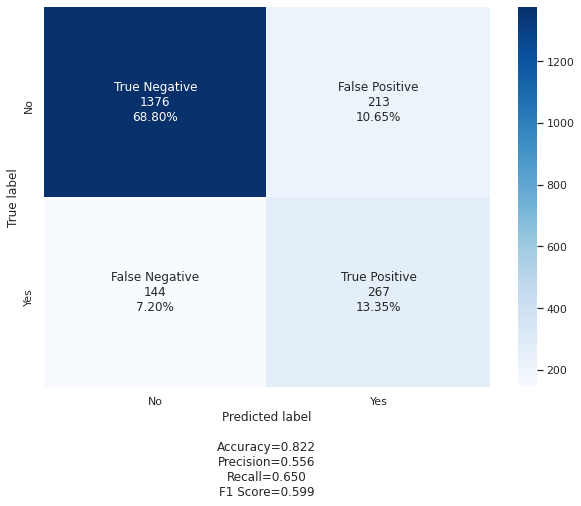

In [ ]:
draw_confusion_matrix(model6)

In [ ]:
opt_threshold,opt_point = find_threshold(model6)

0.8397422057668368
Threshold value is: 0.40879685 point is [0.19320327249842667, 0.7372262773722628]


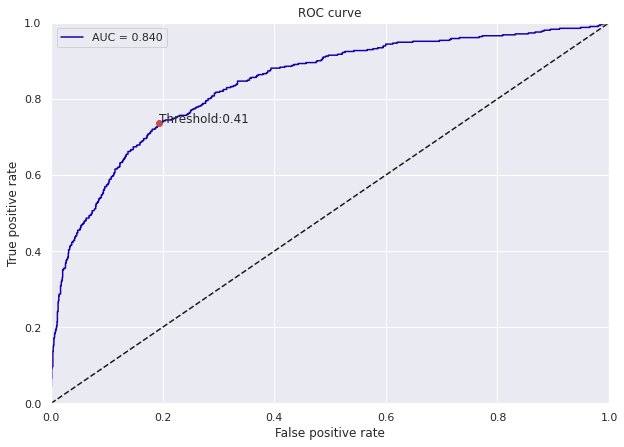

In [ ]:
draw_roc_auc(model6,opt_threshold,opt_point)

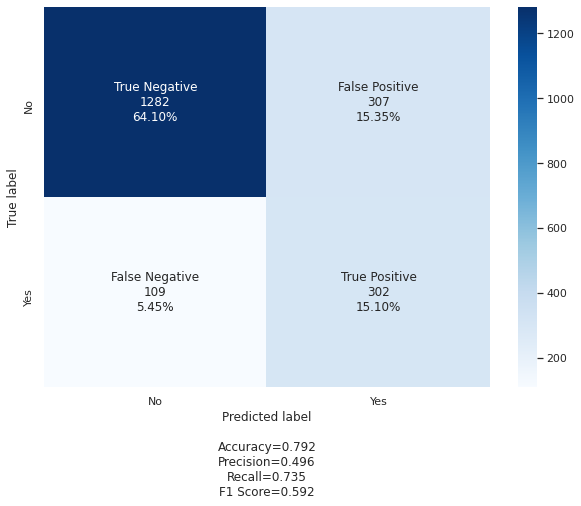

In [ ]:
draw_cm_matrix(model6,opt_threshold)

## **Model 7 - Hyperparameter Tuning**
- Here we start with the gridsearch and run different batch sizes vs epochs and find out the best batch size and epoc.
- Based on the best batch size and epoch find out the best learning rate and dropout rate
- Based on the learning rate and drop out rate, find out the best activation function and init.
- Based on the activate function and init, find out the best number of neurons in each of the hidden layers.
- Once all the hypertuned parameters are determined, fit the model to the training set and determine the results on the test set.

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 22, kernel_initializer = 'he_normal', 
        activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 8, kernel_initializer = 'he_normal', 
        activation = 'relu'))
    classifier.add(Dense(units = 8, kernel_initializer = 'he_normal', 
        activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'he_normal', 
        activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'he_normal', 
        activation = 'sigmoid'))
    classifier.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25],
          'epochs': [50, 75],
          }
grid_search = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 10,n_jobs=-1,verbose=0)
grid_search = grid_search.fit(X_train, y_train)                      # binary classification fraudulent or not

Epoch 1/75
800/800 [==============================] - 2s 1ms/step - loss: 0.5588 - accuracy: 0.7396
Epoch 2/75
800/800 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.8189
Epoch 3/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3790 - accuracy: 0.8395
Epoch 4/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8438
Epoch 5/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.8466
Epoch 6/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.8559
Epoch 7/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8538
Epoch 8/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8572
Epoch 9/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3615 - accuracy: 0.8496
Epoch 10/75
800/800 [==============================] - 1s 1ms/step - loss: 0.3599 - accuracy: 0.8514

In [ ]:
print('Best : {}, using {}'.format(grid_search.best_score_,grid_search.best_params_))

Best : 0.8558749999999999, using {'batch_size': 10, 'epochs': 75}


In [ ]:
def create_model(learning_rate,dropout_rate):
  classifier = Sequential()
  classifier.add(Dense(units = 22, kernel_initializer = 'he_normal', 
        activation = 'relu', input_dim = 11))
  classifier.add(Dropout(dropout_rate))
  classifier.add(Dense(units = 8, kernel_initializer = 'he_normal', 
        activation = 'relu'))
  classifier.add(Dropout(dropout_rate))
  classifier.add(Dense(units = 8, kernel_initializer = 'he_normal', 
        activation = 'relu'))
  classifier.add(Dropout(dropout_rate))
  classifier.add(Dense(units = 4, kernel_initializer = 'he_normal', 
        activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'he_normal', 
        activation = 'sigmoid'))
  classifier.compile(loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    
  adam = Adam(lr = learning_rate)
  classifier.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
  return classifier

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 75)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10,n_jobs=-1)
grid_result = grid.fit(X_train,y_train,)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
params = grid_result.cv_results_['params']

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.7min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best : 0.8601249933242798, using {'dropout_rate': 0.1, 'learning_rate': 0.001}


In [ ]:
# Defining the model

def create_model(activation_function,init):
  classifier = Sequential()
  classifier.add(Dense(units = 22, kernel_initializer = init, 
        activation = 'relu', input_dim = 11))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(units = 8, kernel_initializer = init, 
        activation = 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(units = 8, kernel_initializer = init, 
        activation = 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(units = 4, kernel_initializer = init, 
        activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = init, 
        activation = 'sigmoid'))
  classifier.compile(loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    
  adam = Adam(lr = 0.001)
  classifier.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
  return classifier

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 75)

# Define the grid search parameters

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10,n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 52.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 55.2min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best : 0.8516250133514405, using {'activation_function': 'relu', 'init': 'normal'}


In [ ]:
# Defining the model

def create_model(neuron1,neuron2,neuron3,neuron4):
  classifier = Sequential()
  classifier.add(Dense(neuron1, kernel_initializer = 'normal', 
        activation = 'relu', input_dim = 11))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(neuron2, kernel_initializer = 'normal', 
        activation = 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(neuron3, kernel_initializer = 'normal', 
        activation = 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(neuron4, kernel_initializer = 'normal', 
        activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'normal', 
        activation = 'sigmoid'))
  classifier.compile(loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    
  adam = Adam(lr = 0.001)
  classifier.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
  return classifier

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 75)

# Define the grid search parameters

neuron1 = [16,32]
neuron2 = [8,16]
neuron3 = [4,8]
neuron4 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2=neuron2,neuron3=neuron3,neuron4=neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10,n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 59.9min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` inste

Best : 0.8573749899864197, using {'neuron1': 32, 'neuron2': 16, 'neuron3': 4, 'neuron4': 4}


In [ ]:
classifier = Sequential()
classifier.add(Dense(units=32, kernel_initializer = 'normal', 
        activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=16, kernel_initializer = 'normal', 
        activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=4, kernel_initializer = 'normal', 
        activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=4, kernel_initializer = 'normal', 
        activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', 
        activation = 'sigmoid'))
classifier.compile(loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    
adam = Adam(lr = 0.001)
classifier.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
his_mod7=classifier.fit(X_train,y_train,batch_size=10,epochs=75,validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/75
640/640 [==============================] - 3s 2ms/step - loss: 0.5504 - accuracy: 0.8019 - val_loss: 0.4560 - val_accuracy: 0.7894
Epoch 2/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.7862 - val_loss: 0.4530 - val_accuracy: 0.7894
Epoch 3/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.7904 - val_loss: 0.4479 - val_accuracy: 0.7894
Epoch 4/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.7987 - val_loss: 0.4399 - val_accuracy: 0.8188
Epoch 5/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8301 - val_loss: 0.4383 - val_accuracy: 0.8219
Epoch 6/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8291 - val_loss: 0.4463 - val_accuracy: 0.8181
Epoch 7/75
640/640 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8356 - val_loss: 0.4391 - val_accuracy: 0.8244
Epoch 

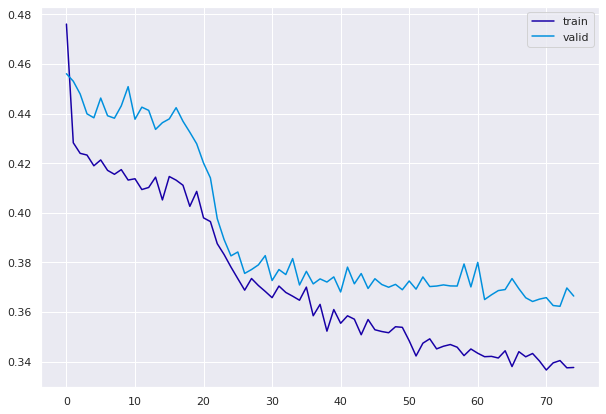

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod7.history)
hist['epoch'] = his_mod7.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
score = classifier.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8585
[0.34956982731819153, 0.8585000038146973]


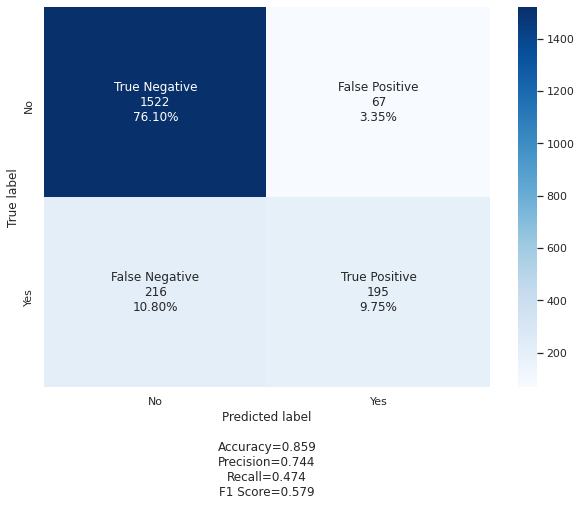

In [ ]:
draw_confusion_matrix(classifier)

In [ ]:
opt_threshold,opt_point = find_threshold(classifier)

0.85818714121875
Threshold value is: 0.20363176 point is [0.18439269981120202, 0.7493917274939172]


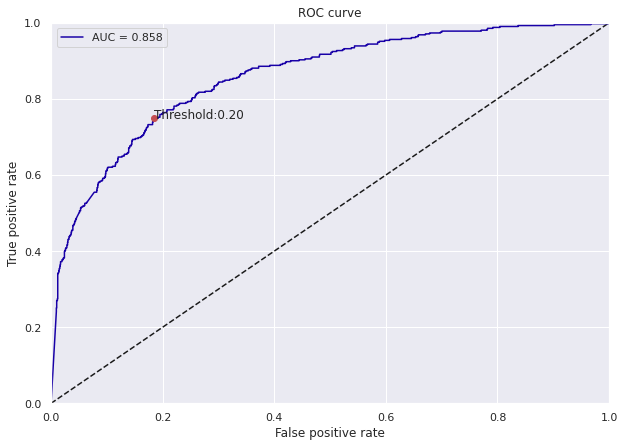

In [ ]:
draw_roc_auc(classifier,opt_threshold,opt_point)

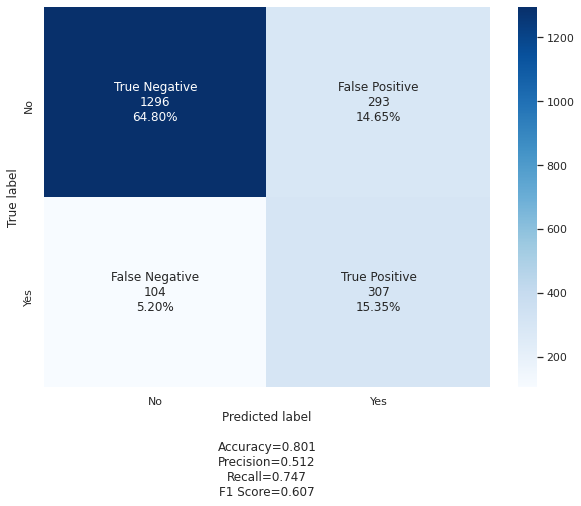

In [ ]:
draw_cm_matrix(classifier,opt_threshold)

In [ ]:
model = ['Model1-Simple','Model2-EarlyStopping','Model3-Weighted Loss','Model4-Dropout','Model5-OverSampling','Model6-UnderSampling','Model7-HyperParameter']
accuracy = [0.85,0.86,0.76,0.86,0.77,0.82,0.86]
accuracy_ts=[0.75,0.81,0.79,0.81,0.77,0.8,0.8]
precision = [0.76,0.74,0.45,0.78,0.47,0.56,0.74]
precision_ts = [0.44,0.52,0.49,0.53,0.47,0.5,0.51]
recall = [0.41,0.48,0.69,0.41,0.74,0.65,0.47]
recall_ts = [0.74,0.72,0.67,0.67,0.73,0.74,0.75]
f1score = [0.53,0.58,0.54,0.53,0.57,0.6,0.59]
f1score_ts = [0.55,0.61,0.57,0.6,0.57,0.59,0.6]
#print(accuracy)

#Sorting models in decreasing order of test recall
comparison = {'Model': model, 
        'Accuracy' : accuracy,
        'Precision' : precision, 
        'Recall':recall,
        'F1Score':f1score
        }

comparison1 = {'Model': model, 
        'Accuracy_TS':accuracy_ts,
        'Precision_TS':precision_ts,
        'Recall_TS':recall_ts,
        'F1Score_TS':f1score_ts}
comparison=pd.DataFrame(comparison)
comparison1=pd.DataFrame(comparison1)
comparison.sort_values(by="Recall", ascending=False)

Model  Accuracy  Precision  Recall  F1Score
4    Model5-OverSampling      0.77       0.47    0.74     0.57
2   Model3-Weighted Loss      0.76       0.45    0.69     0.54
5   Model6-UnderSampling      0.82       0.56    0.65     0.60
1   Model2-EarlyStopping      0.86       0.74    0.48     0.58
6  Model7-HyperParameter      0.86       0.74    0.47     0.59
0          Model1-Simple      0.85       0.76    0.41     0.53
3         Model4-Dropout      0.86       0.78    0.41     0.53

In [ ]:
comparison1.sort_values(by="Recall_TS", ascending=False)

Model  Accuracy_TS  Precision_TS  Recall_TS  F1Score_TS
6  Model7-HyperParameter         0.80          0.51       0.75        0.60
0          Model1-Simple         0.75          0.44       0.74        0.55
5   Model6-UnderSampling         0.80          0.50       0.74        0.59
4    Model5-OverSampling         0.77          0.47       0.73        0.57
1   Model2-EarlyStopping         0.81          0.52       0.72        0.61
2   Model3-Weighted Loss         0.79          0.49       0.67        0.57
3         Model4-Dropout         0.81          0.53       0.67        0.60

**Model Performance Evaluation**

There were 7 models which were run, for each of the models optimal threshold was found using the ROC Curve and the metrics were determined.
- **Models without Optimal Threshold**
- For each of the models the recall is less compared to when you run the model with optimal threshold, but it comes with a cost of decreasing precision and accuracy for each of these cases. 
- When you look at all of these models without applying the threshold the best one for recall is the one with oversampling and the lowest one is drop out / simple model where we had just 4 layers with a drop out or without drop out.
- When it comes to precision and accuracy hyperparameter tuning,  early stopping, simple model and model with a drop out had performed really well.

- **Models with Optimal Threshold**
- The optimal threshold models has got a good recall compared to the same model without optimal threshold.
- When you look at all of these models with threshold applied, the best recall is for the model which is run with hyperparameter tuning.
- When it comes to accuracy all the models have a good accuracy, but the precision for the models with optimal threshold is less compared to the one without threshold.



# Conclude with the key takeaways for the business
- How to reduce the customers from exiting i.e need to reduce False Negatives?
- Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.
- But we should also look into a decent amount of accuracy and precision. Though if the accuracy / precision is less the number of false positives will increase which may not be a big loss for the Bank. 
- The hyperparameter tuning model with threshold applied and the model with undersampling and weighted loss are the ones with a good recall and a decent amount of accuracy and precision.
- Bank should be focusing on these models so that the recall is higher and the accuracy / precision is good. 